# **1.Import libraries and modules**

Keras is available in the google collab by default
from keyword is used to import libraries and modules

MNIST dataset is already available in datasets module under keras

matplotliblibrary has functions to plot arrays as images


In [ ]:
from keras.datasets import mnist
from keras.layers import Flatten, Dense, Dropout, Activation, Conv2D, MaxPooling2D
from keras.models import Sequential

from keras.utils import to_categorical
from keras.callbacks import Callback

Import plotting modules

In [ ]:
import matplotlib.pylab as plt

# **2. Define hyper parameters and variables**

In [ ]:
batch_size=128
num_classes=10
epochs =10

#input image dimensions
img_x, img_y = 28,28

# Load the dataset

In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)
(60000,)
5


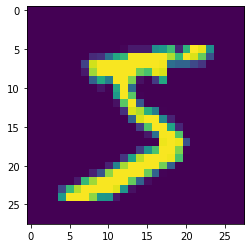

In [ ]:
print(X_train.shape)
plt.imshow(X_train[0])

print(y_train.shape)
print(y_train[0])

load_data function of the mnist loads the train and test data of MNIST into variables X_train,y_train and X_test,y_test.


X_train holds the 60000 training data images, each of which is a 28*28 image

We are plotting the first training sample here.

y_train holds the actual digit corresponding to X_train image.

X_train and y_train are used to train our CNN model

In [ ]:
#reshape the data into 4D tensor-(sample_number,x_img_size,y_img_size, num_channels)
#because the MNIST is greyscale, we only have a single channel-RGB color images would have 3 channels

x_train= X_train.reshape(X_train.shape[0],img_x,img_y,1)
x_test= X_test.reshape(X_test.shape[0],img_x,img_y,1)
input_shape= (img_x,img_y,1)

#convert the data to right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255



Normalize X_train and X-test which has integers between 0 and 255 to floats between 0 and 1 by dividing with 255

Convert the Y values y_train and y_testwhich are class data between 0 and 9 to categorical data

0=[1,0,0,0,0,0,0,0,0,0]

1=[0,1,0,0,0,0,0,0,0,0]

9=[0,0,0,0,0,0,0,0,0,1]


In the example y_train[0] is 5



View pre-processed data

In [ ]:
print('x_train.shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test smaples')

x_train.shape: (60000, 28, 28, 1)
60000 train samples
10000 test smaples


Convert 1-D class arrays to 10-D class matrices  and view the result

In [ ]:
#convert the class vectors to binmary clas matrices this is for use in the categorical_crossentropy loss below
y_train =to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,num_classes)

# Define the base model

DEFINE THE MODEL

Model us defined to be of type Sequential, this means we append layers one by one.

model.add is used to append the layers

CNN has Conv2D and MaxPooling2D layers 

Dense layer gets 1024 parameters

model.compile configures the model for training with all the hyperparameters, takes the loss function as a parameter

model.summary provides a summary of the each layer including the number of trainable parameters. Only Dense layers have trainable parameters.

No. of trainable parameters for convolution layers = (number of filters in convolution layer)*(number of neurons in layer+1)
number of neurons =kernel_size parameters+1

No. of trainable parameters for dense layers = (number of neurons in previous layer+1)*(number of neurons in next layer)



In [ ]:
def baseline_model():
  #create model
  model=Sequential()
  model.add(Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64,kernel_size=(5,5),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
  return model

In [ ]:
model =baseline_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                65600     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

TRAIN THE MODEL

model.fit is used to perform the training of the model

epochs is the number of times the model learns through all training smaples

batch_size is the number of samples taken in one iteration before updating the weights. Balances between memory utilization and stability since batch_size=32 and number of samples=60000, each epoch has 60000/128= 469 mini batches

verbose provides the detailed output of each epoch

loss function is value at the end of each epoch

accuracy calculates how often prediction equal labels. Becomes 1 when all the predictions match expected vlaue. 

In output of fit function, accuracy is with respect to training data.

Since the validation_data is also provided to model.fit, loss, accuracy is for training data and val_loss and val_accuracy are for validation data

In [ ]:
model_log = model.fit(x_train,y_train, batch_size=batch_size, epochs=epochs,verbose=1, validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 56s 118ms/step - loss: 0.5145 - accuracy: 0.8443 - val_loss: 0.0568 - val_accuracy: 0.9819
Epoch 2/10
469/469 [==============================] - 55s 117ms/step - loss: 0.0582 - accuracy: 0.9823 - val_loss: 0.0424 - val_accuracy: 0.9866
Epoch 3/10
469/469 [==============================] - 55s 117ms/step - loss: 0.0377 - accuracy: 0.9876 - val_loss: 0.0382 - val_accuracy: 0.9877
Epoch 4/10
469/469 [==============================] - 55s 117ms/step - loss: 0.0282 - accuracy: 0.9914 - val_loss: 0.0313 - val_accuracy: 0.9894
Epoch 5/10
469/469 [==============================] - 55s 117ms/step - loss: 0.0208 - accuracy: 0.9937 - val_loss: 0.0289 - val_accuracy: 0.9903
Epoch 6/10
469/469 [==============================] - 55s 117ms/step - loss: 0.0171 - accuracy: 0.9945 - val_loss: 0.0388 - val_accuracy: 0.9885
Epoch 7/10
469/469 [==============================] - 55s 117ms/step - loss: 0.0151 - accuracy: 0.9954 - val_loss: 0.0328 - val_ac

model_log maintains the history of loss, accuracy, val_loss and val_accuracy at the end of each epoch

sub_plot method allows multiple sub_plots to be viewed  as a part of same plot

First subplot plots accuracyor both train and test data over epochs

Second subplot plots loss for both tain and test data over epochs

If the graphs are similar for both train and test data, it is an indication no overfitting of train data


In [ ]:
def evaluate_model(model, model_log):
  #score=model.evaluate(x_test,y_test,verbose=0)
  #print('Test loss:', score[0])
  #print('Test accuracy:', score[1])
  print('Train loss:', model_log.history['loss'][-1])
  print('Train accuracy:', model_log.history['accuracy'][-1])

  print('Test loss:', model_log.history['val_loss'][-1])
  print('Test accuracy:', model_log.history['val_accuracy'][-1])

  plt.subplot(2,1,1)
  plt.plot(range(1,11),model_log.history['accuracy'])
  plt.plot(range(1,11),model_log.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train','test'],loc='lower right')

  plt.subplot(2,1,2)
  plt.plot(range(1,11),model_log.history['loss'])
  plt.plot(range(1,11),model_log.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train','test'],loc='upper right')

  plt.tight_layout()
  return


evaluate_model takes model and model_log as parameter

Train accuracy is similar for train and test data (99.7%,99.1%)

After 8th iteration there is slightest indication of overfitting

Train loss: 0.00886900257319212
Train accuracy: 0.9972166419029236
Test loss: 0.030323592945933342
Test accuracy: 0.991100013256073


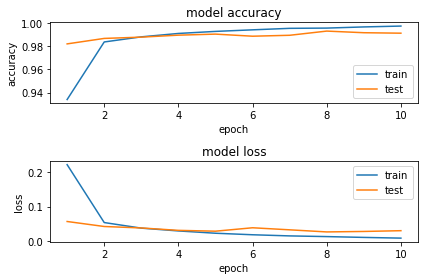

In [ ]:
evaluate_model(model,model_log)

Define the small_model

small_model dunction defines layers of small model 

Kernel size of second convolution layer is 3**3, baseline had 5*5

Second maxpool pool_size is 5*5 , baseline had 2*2

Number of f trainable parameters fell from 118k to 36k

Our dense layer example from previous module had 101k

In [ ]:
def small_model():
  #create model
  model=Sequential()
  model.add(Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(5,5)))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
  return model

In [ ]:
small_model =small_model()
small_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [ ]:
small_model_log = small_model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1, validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 43s 90ms/step - loss: 0.7608 - accuracy: 0.7885 - val_loss: 0.0728 - val_accuracy: 0.9768
Epoch 2/10
469/469 [==============================] - 42s 90ms/step - loss: 0.0756 - accuracy: 0.9766 - val_loss: 0.0463 - val_accuracy: 0.9846
Epoch 3/10
469/469 [==============================] - 42s 89ms/step - loss: 0.0540 - accuracy: 0.9833 - val_loss: 0.0392 - val_accuracy: 0.9872
Epoch 4/10
469/469 [==============================] - 42s 89ms/step - loss: 0.0424 - accuracy: 0.9871 - val_loss: 0.0434 - val_accuracy: 0.9855
Epoch 5/10
469/469 [==============================] - 43s 92ms/step - loss: 0.0352 - accuracy: 0.9896 - val_loss: 0.0429 - val_accuracy: 0.9868
Epoch 6/10
469/469 [==============================] - 42s 89ms/step - loss: 0.0333 - accuracy: 0.9898 - val_loss: 0.0419 - val_accuracy: 0.9859
Epoch 7/10
469/469 [==============================] - 42s 89ms/step - loss: 0.0275 - accuracy: 0.9917 - val_loss: 0.0279 - val_accuracy:

Train loss: 0.020712805911898613
Train accuracy: 0.9929999709129333
Test loss: 0.036253634840250015
Test accuracy: 0.9878000020980835


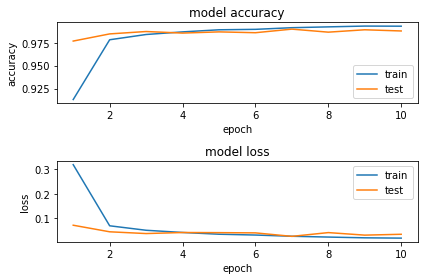

In [ ]:
evaluate_model(small_model,small_model_log)